## Ise and Nagoya Bay Water Quality & Car/Container Data

Authors: C. Herbert & J. Hester

6/28/2021

In [270]:
# Import Packages
import json
import geopandas as gpd
import requests
import numpy as np
import matplotlib.pyplot as plt
import requests
import pandas as pd
import matplotlib.dates as mdates

import numpy as np
from scipy import stats
from scipy.stats import linregress

from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import matplotlib.pyplot as plt

### Part I. Read in Data

***Ise Bay Water***
- Total Suspended Matter (TSM) 
    - Downloaded: TSM_2021-06-28_JP06-N3b.csv (20210628 at 11:29 AM EST)
- Chlorophyll (CHL-A) Downloaded
    - Downloaded: Chl-a_2021-06-28_JP04-N3b.csv

In [109]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

In [95]:
# TSM, change path to where your data is downloaded
ib_tsm = pd.read_csv("C:/Users/claud/Downloads/Ise Bay, TSM_2021-06-28_JP06-N3b.csv", parse_dates=True).rename(columns={'measurement': 'TSM'})
ib_tsm = ib_tsm[["time", "TSM"]]
ib_tsm.head()

,time,TSM
0,2019-01-05T00:00:00.000Z,49.66
1,2019-01-12T00:00:00.000Z,-21.78
2,2019-01-19T00:00:00.000Z,-42.93
3,2019-01-26T00:00:00.000Z,73.00
4,2019-02-02T00:00:00.000Z,67.48


In [127]:
# CHL_A, change path to where your data is downloaded
ib_cha = pd.read_csv("C:/Users/claud/Downloads/Ise Bay, Chl-a_2021-06-28_JP04-N3b.csv", parse_dates=True).rename(columns={'measurement': 'CHL_A'})
ib_cha = ib_cha[["time", "CHL_A"]]
ib_cha.head()

,time,CHL_A
0,2019-01-05T00:00:00.000Z,90.19
1,2019-01-12T00:00:00.000Z,-44.89
2,2019-01-19T00:00:00.000Z,82.41
3,2019-01-26T00:00:00.000Z,290.35
4,2019-02-02T00:00:00.000Z,318.43


In [97]:
# Nagoya_2021-06-28_JP03-E9.csv
nagoya_car = pd.read_csv("C:/Users/claud/Downloads/Nagoya_2021-06-28_JP03-E9.csv", parse_dates=True).rename(columns={'measurement': 'CAR'})
nagoya_car.head()

,time,aoi,CAR,indicatorValue,referenceTime,dataProvider,eoSensor,colorCode,inputData
0,2019-11-27T00:00:00.000Z,"LatLng(35.08, 136.88)",0.86,/,Invalid DateTime,JAXA,ALOS-2,BLUE,industry
1,2020-01-03T00:00:00.000Z,"LatLng(35.08, 136.88)",0.66,/,Invalid DateTime,JAXA,Sentinel-1,BLUE,industry
2,2020-01-27T00:00:00.000Z,"LatLng(35.08, 136.88)",0.74,/,Invalid DateTime,JAXA,Sentinel-1,BLUE,industry
3,2020-01-31T00:00:00.000Z,"LatLng(35.08, 136.88)",0.72,/,Invalid DateTime,JAXA,ALOS-2,BLUE,industry
4,2020-02-08T00:00:00.000Z,"LatLng(35.08, 136.88)",0.96,/,Invalid DateTime,JAXA,Sentinel-1,BLUE,industry


In [153]:
datetimes = pd.to_datetime(ib_tsm ['time_1'])
ib_tsm['time'] = datetimes
print(ib_tsm.head())

datetimes = pd.to_datetime(ib_cha['time'])
ib_cha['time'] = datetimes
print(ib_cha.head())

                       time    TSM  demeaned_TSM                    time_1  \
0 2019-01-05 00:00:00+00:00  49.66     18.668532 2019-01-05 00:00:00+00:00   
1 2019-01-12 00:00:00+00:00 -21.78    -52.771468 2019-01-12 00:00:00+00:00   
2 2019-01-19 00:00:00+00:00 -42.93    -73.921468 2019-01-19 00:00:00+00:00   
3 2019-01-26 00:00:00+00:00  73.00     42.008532 2019-01-26 00:00:00+00:00   
4 2019-02-02 00:00:00+00:00  67.48     36.488532 2019-02-02 00:00:00+00:00   

    ann_TSM  
0  1.602377  
1 -0.702774  
2 -1.385220  
3  2.355487  
4  2.177373  
                       time   CHL_A  ann_CHL_A
0 2019-01-05 00:00:00+00:00   90.19   2.145936
1 2019-01-12 00:00:00+00:00  -44.89  -1.068091
2 2019-01-19 00:00:00+00:00   82.41   1.960823
3 2019-01-26 00:00:00+00:00  290.35   6.908445
4 2019-02-02 00:00:00+00:00  318.43   7.576566


In [154]:
ib_tsm

,time,TSM,demeaned_TSM,time_1,ann_TSM
0,2019-01-05 00:00:00+00:00,49.66,18.668532,2019-01-05 00:00:00+00:00,1.602377
1,2019-01-12 00:00:00+00:00,-21.78,-52.771468,2019-01-12 00:00:00+00:00,-0.702774
2,2019-01-19 00:00:00+00:00,-42.93,-73.921468,2019-01-19 00:00:00+00:00,-1.385220
3,2019-01-26 00:00:00+00:00,73.00,42.008532,2019-01-26 00:00:00+00:00,2.355487
4,2019-02-02 00:00:00+00:00,67.48,36.488532,2019-02-02 00:00:00+00:00,2.177373
5,2019-02-09 00:00:00+00:00,-0.02,-31.011468,2019-02-09 00:00:00+00:00,-0.000645
6,2019-02-23 00:00:00+00:00,-27.92,-58.911468,2019-02-23 00:00:00+00:00,-0.900893
7,2019-03-02 00:00:00+00:00,47.92,16.928532,2019-03-02 00:00:00+00:00,1.546232
8,2019-03-09 00:00:00+00:00,19.73,-11.261468,2019-03-09 00:00:00+00:00,0.636627
9,2019-03-16 00:00:00+00:00,40.13,9.138532,2019-03-16 00:00:00+00:00,1.294873


Combining data: 

In [177]:
ib_water = pd.concat([ib_tsm, ib_cha], axis=1)[["time_1","TSM","CHL_A","ann_TSM","ann_CHL_A"]].rename(columns={'time_1': 'time'})
ib_water.head()

,time,TSM,CHL_A,ann_TSM,ann_CHL_A
0,2019-01-05 00:00:00+00:00,49.66,90.19,1.602377,2.145936
1,2019-01-12 00:00:00+00:00,-21.78,-44.89,-0.702774,-1.068091
2,2019-01-19 00:00:00+00:00,-42.93,82.41,-1.385220,1.960823
3,2019-01-26 00:00:00+00:00,73.00,290.35,2.355487,6.908445
4,2019-02-02 00:00:00+00:00,67.48,318.43,2.177373,7.576566


Pretty sure we don't want to use demeanded data, but wanted to see how different it would look

In [292]:
datetimes = pd.to_datetime(nagoya_car['time'])
nagoya_car['time'] = datetimes
print(nagoya_car.head())

                       time                    aoi   CAR indicatorValue  \
0 2019-11-27 00:00:00+00:00  LatLng(35.08, 136.88)  0.86              /   
1 2020-01-03 00:00:00+00:00  LatLng(35.08, 136.88)  0.66              /   
2 2020-01-27 00:00:00+00:00  LatLng(35.08, 136.88)  0.74              /   
3 2020-01-31 00:00:00+00:00  LatLng(35.08, 136.88)  0.72              /   
4 2020-02-08 00:00:00+00:00  LatLng(35.08, 136.88)  0.96              /   

      referenceTime dataProvider    eoSensor colorCode inputData  \
0  Invalid DateTime         JAXA      ALOS-2      BLUE  industry   
1  Invalid DateTime         JAXA  Sentinel-1      BLUE  industry   
2  Invalid DateTime         JAXA  Sentinel-1      BLUE  industry   
3  Invalid DateTime         JAXA      ALOS-2      BLUE  industry   
4  Invalid DateTime         JAXA  Sentinel-1      BLUE  industry   

   demeaned_CAR   ann_CAR     car_ann  
0      0.018125  1.021529  102.152932  
1     -0.181875  0.783964   78.396437  
2     -0.101875  0.8

In [295]:
ib_tsm = ib_tsm.assign(ann_TSM = (ib_tsm.TSM / 100))
ib_cha = ib_cha.assign(ann_CHL_A= (ib_cha.CHL_A/ 100))
nagoya_car = nagoya_car.assign(car_ann = (nagoya_car.CAR / nagoya_car.CAR.mean())*100)

nagoya_car.head()

,time,aoi,CAR,indicatorValue,referenceTime,dataProvider,eoSensor,colorCode,inputData,demeaned_CAR,ann_CAR,car_ann
0,2019-11-27 00:00:00+00:00,"LatLng(35.08, 136.88)",0.86,/,Invalid DateTime,JAXA,ALOS-2,BLUE,industry,0.018125,1.021529,102.152932
1,2020-01-03 00:00:00+00:00,"LatLng(35.08, 136.88)",0.66,/,Invalid DateTime,JAXA,Sentinel-1,BLUE,industry,-0.181875,0.783964,78.396437
2,2020-01-27 00:00:00+00:00,"LatLng(35.08, 136.88)",0.74,/,Invalid DateTime,JAXA,Sentinel-1,BLUE,industry,-0.101875,0.878990,87.899035
3,2020-01-31 00:00:00+00:00,"LatLng(35.08, 136.88)",0.72,/,Invalid DateTime,JAXA,ALOS-2,BLUE,industry,-0.121875,0.855234,85.523385
4,2020-02-08 00:00:00+00:00,"LatLng(35.08, 136.88)",0.96,/,Invalid DateTime,JAXA,Sentinel-1,BLUE,industry,0.118125,1.140312,114.031180


Plotting our data: 

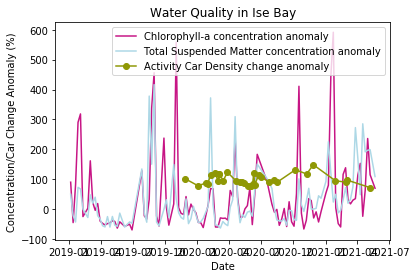

In [298]:
plt.plot(ib_cha.time, ib_cha.CHL_A, color='mediumvioletred', label = 'Chlorophyll-a concentration anomaly')
plt.plot(ib_tsm.time, ib_tsm.TSM, color='lightblue', label='Total Suspended Matter concentration anomaly')
plt.plot(nagoya_car.time, nagoya_car.car_ann, marker='o', color='#8f9805', label = "Activity Car Density change anomaly") 

formatter = mdates.DateFormatter("%Y-%m")
ax = plt.gca()
ax.xaxis.set_major_formatter(formatter)
# plt.plot(nagoya_car.time, nagoya_car.demeaned_CAR)
plt.xlabel('Date')

plt.legend()
plt.ylabel('Concentration/Car Change Anomaly (%)')
plt.title('Water Quality in Ise Bay')
plt.show()

Because our car and container data is limited temporally and an indexed, let's look at it on it's own axis

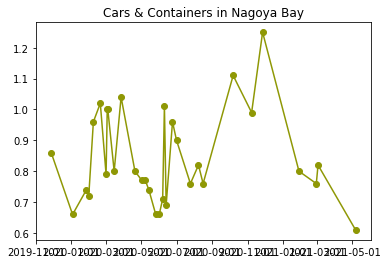

In [273]:
plt.plot(nagoya_car.time, nagoya_car.CAR, marker='o', color='#8f9805') 
formatter = mdates.DateFormatter("%Y-%m-%d")
ax = plt.gca()
ax.xaxis.set_major_formatter(formatter)
plt.title('Cars & Containers in Nagoya Bay')
plt.show()

let's now look at the dates between the shutdown periods

In [246]:
# enter the dates in-between the lockdowns
start_lock_1 = '2020-03-25 00:00:00+00:00'
end_lock_1 = '2020-05-20 00:00:00+00:00'

start_lock_2 = '2020-07-01 00:00:00+00:00'
end_lock_2 = '2021-06-28 00:00:00+00:00'

# for Japan it was encouraged:  March 25, 2020 - May 21, 2020 and then July 2020-now
mask_1 = (ib_water['time'] > start_lock_1) & (ib_water['time'] <= end_lock_1)
mask_2 = (ib_water['time'] > start_lock_1) & (ib_water['time'] <= end_lock_1)

mask_1_car = (nagoya_car['time'] > start_lock_2) & (nagoya_car['time'] <= end_lock_2)
mask_2_car = (nagoya_car['time'] > start_lock_2) & (nagoya_car['time'] <= end_lock_2)

In [248]:
shut_1 = ib_water.loc[mask_1]
shut_1_car = nagoya_car.loc[mask_1_car]
shut_1.mean()

TSM          28.682500
CHL_A        36.896250
ann_TSM       0.925497
ann_CHL_A     0.877891
dtype: float64

In [249]:
# shut_1_car.mean()
shut_2_car.mean()

CAR             0.868000
demeaned_CAR    0.026125
ann_CAR         1.031032
dtype: float64

In [209]:
shut_2 = ib_water.loc[mask_2]
shut_2_car = nagoya_car.loc[mask_2_car]
shut_2.mean()

TSM          56.748810
CHL_A        59.052857
ann_TSM       1.831111
ann_CHL_A     1.405075
dtype: float64

image: Emran Kassim from Nagoya, Aichi, Japan, CC BY 2.0 <https://creativecommons.org/licenses/by/2.0>, via Wikimedia Commons

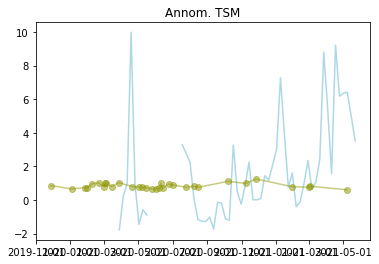

In [266]:
plt.plot(shut_1.time, shut_1.ann_TSM, color='lightblue') 
plt.plot(shut_2.time, shut_2.ann_TSM, color='lightblue')
plt.plot(nagoya_car.time, nagoya_car.CAR, marker='o', color='#8f9805', alpha = .5) 
formatter = mdates.DateFormatter("%Y-%m-%d")
ax = plt.gca()
ax.xaxis.set_major_formatter(formatter)
plt.title('Annom. TSM')
plt.show()

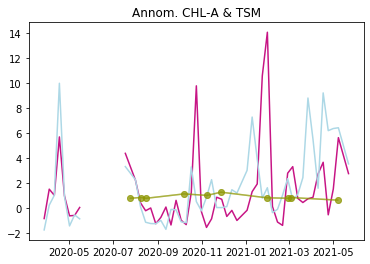

In [268]:
plt.plot(shut_1.time, shut_1.ann_CHL_A,  color='mediumvioletred') 
plt.plot(shut_2.time, shut_2.ann_CHL_A,  color='mediumvioletred')
plt.plot(shut_1.time, shut_1.ann_TSM, color='lightblue') 
plt.plot(shut_2.time, shut_2.ann_TSM, color='lightblue')
plt.plot(shut_1_car.time, shut_1_car.CAR,  marker='o', color='#8f9805', alpha = .5) 
plt.plot(shut_2_car.time, shut_2_car.CAR,  marker='o', color='#8f9805', alpha = .5) 
formatter = mdates.DateFormatter("%Y-%m")
ax = plt.gca()
ax.xaxis.set_major_formatter(formatter)
plt.title('Annom. CHL-A & TSM')
plt.show()

Correlations before and after lockdowns: 